<a href="https://colab.research.google.com/github/ahafarag/Understanding-the-Number-of-Digits-in-Powers-of-2/blob/master/find_mersenne_primes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def is_prime_simple(n):
    """Return True if n is a prime number, otherwise False."""
    if n <= 1:
        return False
    for i in range(2, n):
        if n % i == 0:
            return False
    return True

def find_mersenne_primes(limit):
    """Find and print Mersenne primes for prime numbers up to the given limit."""
    for p in range(2, limit + 1):
        if is_prime_simple(p):
            mersenne_number = 2**p - 1
            if is_prime_simple(mersenne_number):
                print(f"p = {p} gives Mersenne prime: {mersenne_number}")

# Set the range limit for p (you can change this as you wish)
limit = 31

# Find Mersenne primes in the given range
find_mersenne_primes(limit)


p = 2 gives Mersenne prime: 3
p = 3 gives Mersenne prime: 7
p = 5 gives Mersenne prime: 31
p = 7 gives Mersenne prime: 127
p = 13 gives Mersenne prime: 8191
p = 17 gives Mersenne prime: 131071
p = 19 gives Mersenne prime: 524287
p = 31 gives Mersenne prime: 2147483647


In [3]:
# Now lets try with Multiple cores

In [4]:
import concurrent.futures
import os

def is_prime_simple(n):
    """Return True if n is a prime number, otherwise False."""
    if n <= 1:
        return False
    for i in range(2, n):
        if n % i == 0:
            return False
    return True

def check_mersenne_prime(p):
    """Check if 2^p - 1 is a Mersenne prime and return the result."""
    if is_prime_simple(p):
        mersenne_number = 2**p - 1
        if is_prime_simple(mersenne_number):
            return f"p = {p} gives Mersenne prime: {mersenne_number}"
    return None

def find_mersenne_primes_parallel(limit):
    """Find and print Mersenne primes up to a given limit using parallel processing."""
    with concurrent.futures.ProcessPoolExecutor() as executor:
        results = list(executor.map(check_mersenne_prime, range(2, limit + 1)))

    for result in results:
        if result is not None:
            print(result)

# Set the range limit for p (you can change this as you wish)
limit = 31

# Find Mersenne primes in the given range using parallel processing
find_mersenne_primes_parallel(limit)


p = 2 gives Mersenne prime: 3
p = 3 gives Mersenne prime: 7
p = 5 gives Mersenne prime: 31
p = 7 gives Mersenne prime: 127
p = 13 gives Mersenne prime: 8191
p = 17 gives Mersenne prime: 131071
p = 19 gives Mersenne prime: 524287
p = 31 gives Mersenne prime: 2147483647


In [5]:
# Now lets maximize the memory usage

In [6]:
def is_prime_simple(n):
    """Return True if n is a prime number, otherwise False."""
    if n <= 1:
        return False
    for i in range(2, n):
        if n % i == 0:
            return False
    return True

def find_mersenne_primes_in_range(start, end):
    """Find and print Mersenne primes within a given range."""
    for p in range(start, end + 1):
        if is_prime_simple(p):
            mersenne_number = 2**p - 1
            if is_prime_simple(mersenne_number):
                # Print immediately when a Mersenne prime is found
                print(f"p = {p} gives Mersenne prime: {mersenne_number}")

# Example: Divide the work into jobs
def find_mersenne_primes_jobs(limit, job_size):
    """Divide the work into jobs and process them sequentially."""
    for start in range(2, limit + 1, job_size):
        end = min(start + job_size - 1, limit)
        find_mersenne_primes_in_range(start, end)

# Set the range limit for p and job size
limit = 31
job_size = 10  # Process 10 exponents per job

# Find Mersenne primes in the given range using job division
find_mersenne_primes_jobs(limit, job_size)

p = 2 gives Mersenne prime: 3
p = 3 gives Mersenne prime: 7
p = 5 gives Mersenne prime: 31
p = 7 gives Mersenne prime: 127
p = 13 gives Mersenne prime: 8191
p = 17 gives Mersenne prime: 131071
p = 19 gives Mersenne prime: 524287
p = 31 gives Mersenne prime: 2147483647


In [7]:
# new enhancement

In [8]:
import random

def miller_rabin(n, k=5):
    """Use the Miller-Rabin test to check primality with k iterations."""
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0:
        return False

    # Write n-1 as 2^r * d
    r, d = 0, n - 1
    while d % 2 == 0:
        r += 1
        d //= 2

    # Witness loop
    for _ in range(k):
        a = random.randint(2, n - 2)
        x = pow(a, d, n)
        if x == 1 or x == n - 1:
            continue
        for _ in range(r - 1):
            x = pow(x, 2, n)
            if x == n - 1:
                break
        else:
            return False
    return True

def check_mersenne_prime(p):
    """Check if 2^p - 1 is a Mersenne prime and return the result."""
    if miller_rabin(p):  # Using the Miller-Rabin test to check if p is prime
        mersenne_number = 2**p - 1
        if miller_rabin(mersenne_number):  # Check if 2^p - 1 is prime
            return f"p = {p} gives Mersenne prime: {mersenne_number}"
    return None

def find_mersenne_primes_in_range(start, end):
    """Find and print Mersenne primes within a given range."""
    for p in range(start, end + 1):
        result = check_mersenne_prime(p)
        if result:
            print(result)

# Example: Divide the work into jobs
def find_mersenne_primes_jobs(limit, job_size):
    """Divide the work into jobs and process them sequentially."""
    for start in range(2, limit + 1, job_size):
        end = min(start + job_size - 1, limit)
        find_mersenne_primes_in_range(start, end)

# Set the range limit for p and job size
limit = 31  # You can set this to a higher value to find more Mersenne primes
job_size = 10  # Process 10 exponents per job

# Find Mersenne primes in the given range using job division
find_mersenne_primes_jobs(limit, job_size)


p = 2 gives Mersenne prime: 3
p = 3 gives Mersenne prime: 7
p = 5 gives Mersenne prime: 31
p = 7 gives Mersenne prime: 127
p = 13 gives Mersenne prime: 8191
p = 17 gives Mersenne prime: 131071
p = 19 gives Mersenne prime: 524287
p = 31 gives Mersenne prime: 2147483647


In [9]:
# A better performance :D

In [17]:
import random

def miller_rabin(n, k=5):
    """Use the Miller-Rabin test to check primality with k iterations."""
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0:
        return False

    # Write n-1 as 2^r * d
    r, d = 0, n - 1
    while d % 2 == 0:
        r += 1
        d //= 2

    # Witness loop
    for _ in range(k):
        a = random.randint(2, n - 2)
        x = pow(a, d, n)
        if x == 1 or x == n - 1:
            continue
        for _ in range(r - 1):
            x = pow(x, 2, n)
            if x == n - 1:
                break
        else:
            return False
    return True

def lucas_lehmer_test(p):
    """Perform the Lucas-Lehmer test for Mersenne primes."""
    if p == 2:
        return True
    s = 4
    M = 2**p - 1
    for _ in range(p - 2):
        s = (s * s - 2) % M
    return s == 0

def format_large_prime(prime, digits_to_show=5):
    """Format large prime numbers to show in human-readable form."""
    prime_str = str(prime)
    if len(prime_str) > 20:  # Adjust this threshold as needed
        return f"{prime_str[:digits_to_show]}...{prime_str[-digits_to_show:]}"
    return prime_str

def check_mersenne_prime(p):
    """Check if 2^p - 1 is a Mersenne prime using the Lucas-Lehmer test."""
    if miller_rabin(p):  # Ensure p is prime before using Lucas-Lehmer
        if lucas_lehmer_test(p):
            mersenne_number = 2**p - 1
            formatted_prime = format_large_prime(mersenne_number)
            return f"p = {p} gives Mersenne prime: {formatted_prime}"
    return None

def find_mersenne_primes_in_range(start, end):
    """Find and print Mersenne primes within a given range."""
    for p in range(start, end + 1):
        result = check_mersenne_prime(p)
        if result:
            print(result)

# Example: Divide the work into jobs
def find_mersenne_primes_jobs(limit, job_size):
    """Divide the work into jobs and process them sequentially."""
    for start in range(2, limit + 1, job_size):
        end = min(start + job_size - 1, limit)
        find_mersenne_primes_in_range(start, end)

# Set the range limit for p and job size
limit = 10000  # You can set this to a higher value to find more Mersenne primes
job_size = 10  # Process 10 exponents per job

# Find Mersenne primes in the given range using job division
find_mersenne_primes_jobs(limit, job_size)


p = 2 gives Mersenne prime: 3
p = 3 gives Mersenne prime: 7
p = 5 gives Mersenne prime: 31
p = 7 gives Mersenne prime: 127
p = 13 gives Mersenne prime: 8191
p = 17 gives Mersenne prime: 131071
p = 19 gives Mersenne prime: 524287
p = 31 gives Mersenne prime: 2147483647
p = 61 gives Mersenne prime: 2305843009213693951
p = 89 gives Mersenne prime: 61897...62111
p = 107 gives Mersenne prime: 16225...88127
p = 127 gives Mersenne prime: 17014...05727
p = 521 gives Mersenne prime: 68647...57151
p = 607 gives Mersenne prime: 53113...28127
p = 1279 gives Mersenne prime: 10407...29087
p = 2203 gives Mersenne prime: 14759...71007
p = 2281 gives Mersenne prime: 44608...36351
p = 3217 gives Mersenne prime: 25911...15071
p = 4253 gives Mersenne prime: 19079...84991
p = 4423 gives Mersenne prime: 28554...80607
p = 9689 gives Mersenne prime: 47822...54111
p = 9941 gives Mersenne prime: 34608...63551


In [18]:
# visualize results and added more features

Number of CPU cores: 2
Total number of jobs: 20


100%|██████████| 20/20 [09:04<00:00, 27.21s/it]


Total time taken: 544.27 seconds


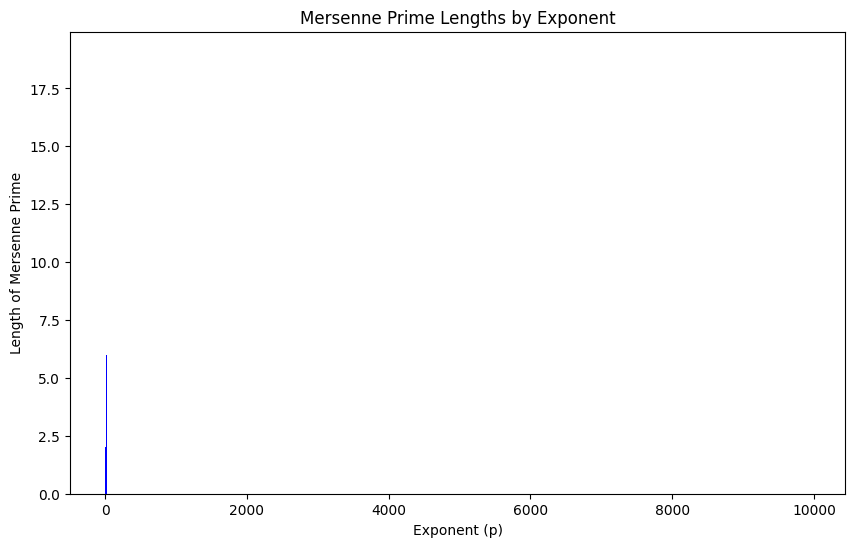

In [20]:
import concurrent.futures
import random
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import multiprocessing
import os

def miller_rabin(n, k=5):
    """Use the Miller-Rabin test to check primality with k iterations."""
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0:
        return False

    # Write n-1 as 2^r * d
    r, d = 0, n - 1
    while d % 2 == 0:
        r += 1
        d //= 2

    # Witness loop
    for _ in range(k):
        a = random.randint(2, n - 2)
        x = pow(a, d, n)
        if x == 1 or x == n - 1:
            continue
        for _ in range(r - 1):
            x = pow(x, 2, n)
            if x == n - 1:
                break
        else:
            return False
    return True

def lucas_lehmer_test(p):
    """Perform the Lucas-Lehmer test for Mersenne primes."""
    if p == 2:
        return True
    s = 4
    M = 2**p - 1
    for _ in range(p - 2):
        s = (s * s - 2) % M
    return s == 0

def format_large_prime(prime, digits_to_show=5):
    """Format large prime numbers to show in human-readable form."""
    prime_str = str(prime)
    if len(prime_str) > 20:  # Adjust this threshold as needed
        return f"{prime_str[:digits_to_show]}...{prime_str[-digits_to_show:]}"
    return prime_str

def check_mersenne_prime(p):
    """Check if 2^p - 1 is a Mersenne prime using the Lucas-Lehmer test."""
    if miller_rabin(p):  # Ensure p is prime before using Lucas-Lehmer
        if lucas_lehmer_test(p):
            mersenne_number = 2**p - 1
            formatted_prime = format_large_prime(mersenne_number)
            return (p, mersenne_number, formatted_prime)
    return None

def find_mersenne_primes_in_range(start, end, found_exponents):
    """Find Mersenne primes within a given range, skipping already found ones."""
    results = []
    for p in range(start, end + 1):
        if p in found_exponents:
            continue  # Skip already found exponents
        result = check_mersenne_prime(p)
        if result:
            results.append(result)
    return results

def parallel_find_mersenne_primes(limit, job_size, found_exponents):
    """Find Mersenne primes using parallel processing."""
    num_jobs = (limit - 2) // job_size + 1
    num_cores = multiprocessing.cpu_count()

    print(f"Number of CPU cores: {num_cores}")
    print(f"Total number of jobs: {num_jobs}")

    all_results = []

    with concurrent.futures.ProcessPoolExecutor(max_workers=num_cores) as executor:
        futures = []
        for i in range(num_jobs):
            start = 2 + i * job_size
            end = min(start + job_size - 1, limit)
            futures.append(executor.submit(find_mersenne_primes_in_range, start, end, found_exponents))

        for future in tqdm(concurrent.futures.as_completed(futures), total=num_jobs):
            result = future.result()
            if result:
                all_results.extend(result)

    return all_results

def save_results(results, filename="mersenne_primes.txt"):
    """Save the Mersenne prime results to a file."""
    with open(filename, "a") as f:  # Append mode to add new results
        for p, prime, formatted_prime in results:
            f.write(f"p = {p}, Mersenne prime: {formatted_prime}\n")

def load_results(filename="mersenne_primes.txt"):
    """Load the Mersenne prime results from a file."""
    results = []
    found_exponents = set()
    if os.path.exists(filename):
        with open(filename, "r") as f:
            for line in f:
                parts = line.strip().split(", Mersenne prime: ")
                p = int(parts[0].split(" = ")[1])
                formatted_prime = parts[1]
                found_exponents.add(p)
                results.append((p, None, formatted_prime))
    return results, found_exponents

def reset_results(filename="mersenne_primes.txt"):
    """Reset the results by clearing the saved file."""
    if os.path.exists(filename):
        os.remove(filename)
        print(f"Results file '{filename}' has been reset.")

def visualize_mersenne_primes(results):
    """Visualize the distribution of Mersenne primes."""
    exponents = [res[0] for res in results]
    prime_lengths = [len(str(res[2])) for res in results]

    plt.figure(figsize=(10, 6))
    plt.bar(exponents, prime_lengths, color='blue')
    plt.xlabel('Exponent (p)')
    plt.ylabel('Length of Mersenne Prime')
    plt.title('Mersenne Prime Lengths by Exponent')
    plt.show()

# Set the range limit for p and job size
limit = 10000  # Adjust this limit to find more Mersenne primes
job_size = 500  # Process 500 exponents per job

# Load previously found results to skip them
previous_results, found_exponents = load_results()

# Start the timer
start_time = time.time()

# Find Mersenne primes using parallel processing, skipping found ones
new_results = parallel_find_mersenne_primes(limit, job_size, found_exponents)

# Stop the timer
end_time = time.time()

# Save the new results to the file
save_results(new_results)

# Combine previous and new results for visualization and output
all_results = previous_results + new_results

# Print the results
for p, prime, formatted_prime in new_results:
    print(f"p = {p} gives Mersenne prime: {formatted_prime}")

# Print total time taken
print(f"Total time taken: {end_time - start_time:.2f} seconds")

# Visualize the results
visualize_mersenne_primes(all_results)


In [21]:
# another improvement

Previously found Mersenne primes:
p = 2, Mersenne prime: 3
p = 3, Mersenne prime: 7
p = 5, Mersenne prime: 31
p = 7, Mersenne prime: 127
p = 13, Mersenne prime: 8191
p = 17, Mersenne prime: 131071
p = 19, Mersenne prime: 524287
p = 31, Mersenne prime: 2147483647
p = 61, Mersenne prime: 2305843009213693951
p = 89, Mersenne prime: 61897...62111
p = 107, Mersenne prime: 16225...88127
p = 127, Mersenne prime: 17014...05727
p = 521, Mersenne prime: 68647...57151
p = 607, Mersenne prime: 53113...28127
p = 1279, Mersenne prime: 10407...29087
p = 2203, Mersenne prime: 14759...71007
p = 2281, Mersenne prime: 44608...36351
p = 3217, Mersenne prime: 25911...15071
p = 4253, Mersenne prime: 19079...84991
p = 4423, Mersenne prime: 28554...80607
p = 9689, Mersenne prime: 47822...54111
p = 9941, Mersenne prime: 34608...63551
p = 11213, Mersenne prime: 28141...92191
Starting from p = 11214...
Number of CPU cores: 2
Total number of jobs: 30


 23%|██▎       | 7/30 [27:44<1:31:08, 237.75s/it]


Total time taken: 1664.30 seconds


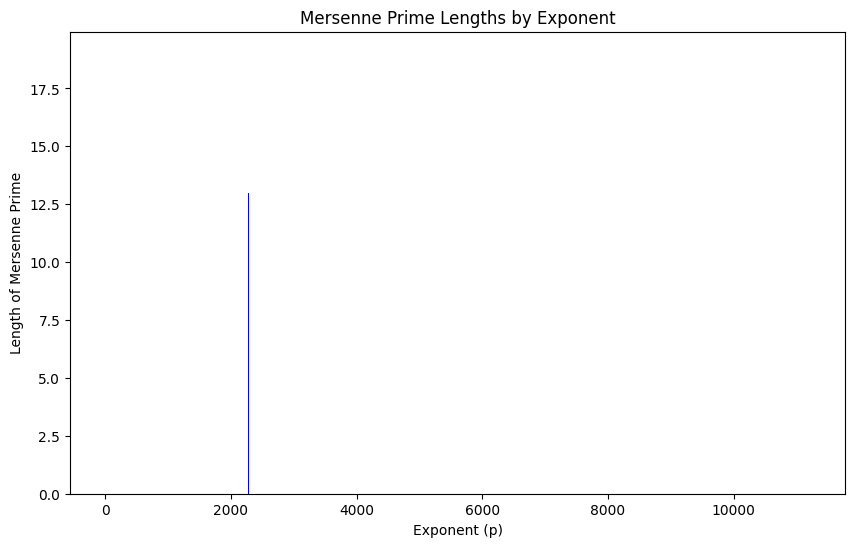

In [3]:
import concurrent.futures
import random
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import multiprocessing
import os

def miller_rabin(n, k=5):
    """Use the Miller-Rabin test to check primality with k iterations."""
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0:
        return False

    # Write n-1 as 2^r * d
    r, d = 0, n - 1
    while d % 2 == 0:
        r += 1
        d //= 2

    # Witness loop
    for _ in range(k):
        a = random.randint(2, n - 2)
        x = pow(a, d, n)
        if x == 1 or x == n - 1:
            continue
        for _ in range(r - 1):
            x = pow(x, 2, n)
            if x == n - 1:
                break
        else:
            return False
    return True

def lucas_lehmer_test(p):
    """Perform the Lucas-Lehmer test for Mersenne primes."""
    if p == 2:
        return True
    s = 4
    M = 2**p - 1
    for _ in range(p - 2):
        s = (s * s - 2) % M
    return s == 0

def format_large_prime(prime, digits_to_show=5):
    """Format large prime numbers to show in human-readable form."""
    prime_str = str(prime)
    if len(prime_str) > 20:  # Adjust this threshold as needed
        return f"{prime_str[:digits_to_show]}...{prime_str[-digits_to_show:]}"
    return prime_str

def check_mersenne_prime(p):
    """Check if 2^p - 1 is a Mersenne prime using the Lucas-Lehmer test."""
    if miller_rabin(p):  # Ensure p is prime before using Lucas-Lehmer
        if lucas_lehmer_test(p):
            mersenne_number = 2**p - 1
            formatted_prime = format_large_prime(mersenne_number)
            return (p, mersenne_number, formatted_prime)
    return None

def find_mersenne_primes_in_range(start, end, found_exponents, output_file):
    """Find Mersenne primes within a given range, skipping already found ones."""
    results = []
    for p in range(start, end + 1):
        if p in found_exponents:
            print(f"p = {p} was found previously")
            continue  # Skip already found exponents
        result = check_mersenne_prime(p)
        if result:
            p, prime, formatted_prime = result
            print(f"p = {p} gives Mersenne prime: {formatted_prime}")
            save_results([(p, prime, formatted_prime)], output_file)  # Save immediately
            results.append(result)
    return results

def parallel_find_mersenne_primes(limit, job_size, found_exponents, output_file):
    """Find Mersenne primes using parallel processing."""
    num_jobs = (limit - 2) // job_size + 1
    num_cores = multiprocessing.cpu_count()

    print(f"Number of CPU cores: {num_cores}")
    print(f"Total number of jobs: {num_jobs}")

    all_results = []

    with concurrent.futures.ProcessPoolExecutor(max_workers=num_cores) as executor:
        futures = []
        for i in range(num_jobs):
            start = 2 + i * job_size
            end = min(start + job_size - 1, limit)
            if start > max(found_exponents, default=0):  # Skip jobs that are entirely before the last found prime
                futures.append(executor.submit(find_mersenne_primes_in_range, start, end, found_exponents, output_file))

        for future in tqdm(concurrent.futures.as_completed(futures), total=num_jobs):
            result = future.result()
            if result:
                all_results.extend(result)

    return all_results

def save_results(results, filename="mersenne_primes.txt"):
    """Save the Mersenne prime results to a file."""
    with open(filename, "a") as f:  # Append mode to add new results
        for p, prime, formatted_prime in results:
            f.write(f"p = {p}, Mersenne prime: {formatted_prime}\n")

def load_results(filename="mersenne_primes.txt"):
    """Load the Mersenne prime results from a file."""
    results = []
    found_exponents = set()
    if os.path.exists(filename):
        with open(filename, "r") as f:
            for line in f:
                parts = line.strip().split(", Mersenne prime: ")
                p = int(parts[0].split(" = ")[1])
                formatted_prime = parts[1]
                found_exponents.add(p)
                results.append((p, None, formatted_prime))
    return results, found_exponents

def reset_results(filename="mersenne_primes.txt"):
    """Reset the results by clearing the saved file."""
    if os.path.exists(filename):
        os.remove(filename)
        print(f"Results file '{filename}' has been reset.")

def visualize_mersenne_primes(results):
    """Visualize the distribution of Mersenne primes."""
    exponents = [res[0] for res in results]
    prime_lengths = [len(str(res[2])) for res in results]

    plt.figure(figsize=(10, 6))
    plt.bar(exponents, prime_lengths, color='blue')
    plt.xlabel('Exponent (p)')
    plt.ylabel('Length of Mersenne Prime')
    plt.title('Mersenne Prime Lengths by Exponent')
    plt.show()

# Set the range limit for p and job size
limit = 15000  # Adjust this limit to find more Mersenne primes
job_size = 500  # Process 500 exponents per job
output_file = "mersenne_primes.txt"

# Load previously found results to skip them
previous_results, found_exponents = load_results(output_file)

# Print all previously found primes
print("Previously found Mersenne primes:")
for p, _, formatted_prime in previous_results:
    print(f"p = {p}, Mersenne prime: {formatted_prime}")

# Find the next starting point after the last found exponent
start_point = max(found_exponents, default=1) + 1
if start_point > limit:
    print(f"All primes up to {limit} have been found.")
else:
    print(f"Starting from p = {start_point}...")

# Start the timer
start_time = time.time()

# Find Mersenne primes using parallel processing, skipping found ones
new_results = parallel_find_mersenne_primes(limit, job_size, found_exponents, output_file)

# Stop the timer
end_time = time.time()

# Combine previous and new results for visualization and output
all_results = previous_results + new_results

# Print total time taken
print(f"Total time taken: {end_time - start_time:.2f} seconds")

# Visualize the results
visualize_mersenne_primes(all_results)


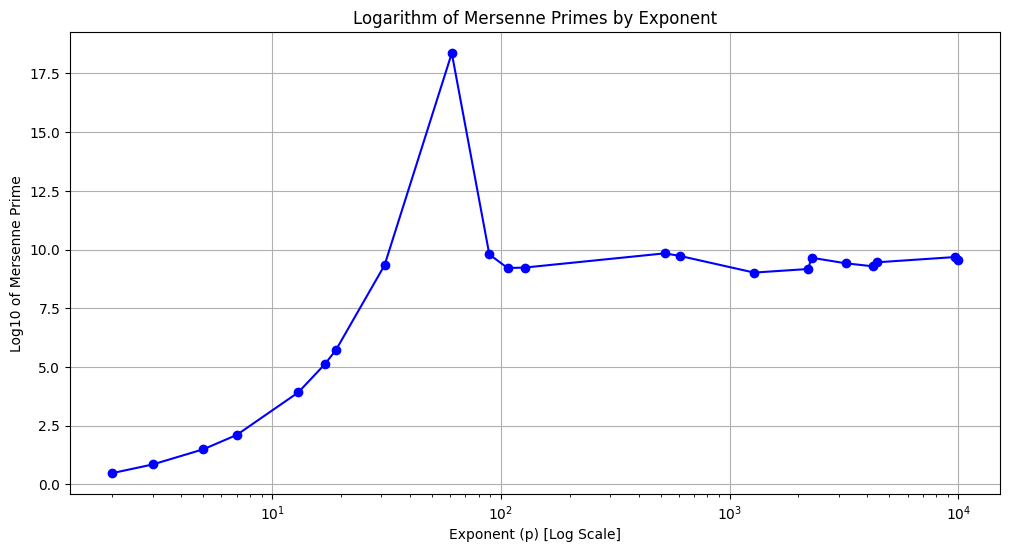

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Function to read the Mersenne primes from the output file
def read_mersenne_primes_from_file(filename="mersenne_primes.txt"):
    exponents = []
    mersenne_primes = []

    with open(filename, "r") as file:
        for line in file:
            parts = line.strip().split(", Mersenne prime: ")
            if len(parts) == 2:
                p_str = parts[0].split(" = ")[1]
                p = int(p_str)
                prime_str = parts[1].replace("...", "")
                try:
                    prime = int(prime_str)
                    exponents.append(p)
                    mersenne_primes.append(prime)
                except ValueError:
                    print(f"Skipping large prime at p = {p}")

    return exponents, mersenne_primes

# Read the data from the file
exponents, mersenne_primes = read_mersenne_primes_from_file()

# Ensure the lists are not empty and have matching lengths
if len(exponents) == len(mersenne_primes) and len(exponents) > 0:
    log_mersenne_primes = [np.log10(prime) for prime in mersenne_primes]

    # Plot with a logarithmic scale for the x-axis
    plt.figure(figsize=(12, 6))
    plt.plot(exponents, log_mersenne_primes, marker='o', linestyle='-', color='blue')

    plt.xscale('log')
    plt.xlabel('Exponent (p) [Log Scale]')
    plt.ylabel('Log10 of Mersenne Prime')
    plt.title('Logarithm of Mersenne Primes by Exponent')
    plt.grid(True)
    plt.show()
else:
    print("There seems to be an issue with the data. Please check the output file for correctness.")


In [32]:
#Basic Model Exploration

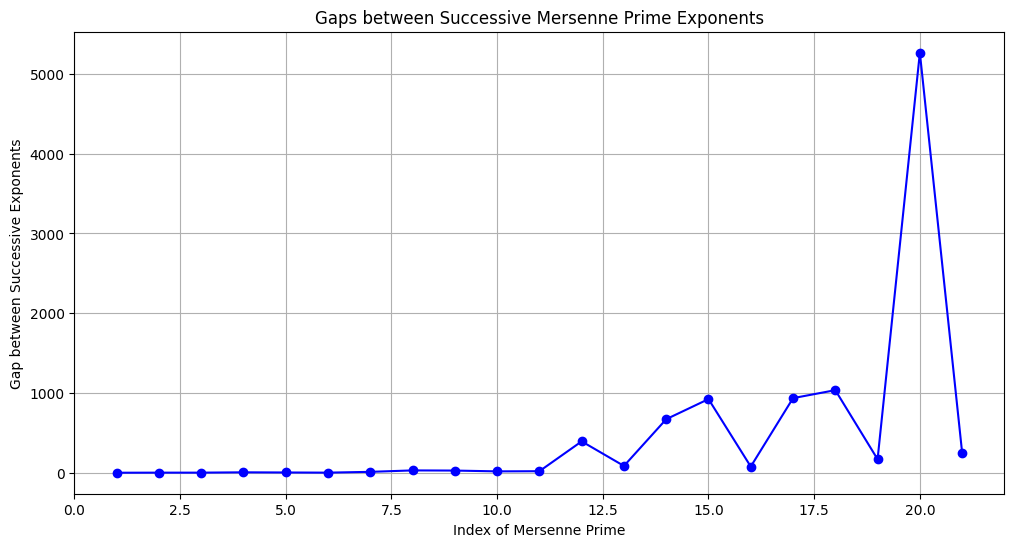

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: known exponents of Mersenne primes
# = [2, 3, 5, 7, 13, 17, 19, 31, 61, 89, 107, 127, 521, 607, 1279, 2203, 2281, 3217, 4253, 4423, 9689, 9941]
exponents, mersenne_primes = read_mersenne_primes_from_file()

# Calculate gaps between successive exponents
gaps = np.diff(exponents)

# Plot gaps to see if there's any pattern
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(exponents)), gaps, marker='o', linestyle='-', color='blue')
plt.xlabel('Index of Mersenne Prime')
plt.ylabel('Gap between Successive Exponents')
plt.title('Gaps between Successive Mersenne Prime Exponents')
plt.grid(True)
plt.show()


 Explore Skip Patterns

In [4]:
import time

def lucas_lehmer_full(p):
    """Standard Lucas-Lehmer Test"""
    M_p = (1 << p) - 1  # Mersenne number 2^p - 1
    s = 4
    for i in range(1, p - 1):
        s = (s * s - 2) % M_p
    return s == 0

def lucas_lehmer_skip(p, skip_interval):
    """Lucas-Lehmer Test with Skipping Iterations"""
    M_p = (1 << p) - 1  # Mersenne number 2^p - 1
    s = 4
    for i in range(1, p - 1):
        if i % skip_interval != 0:
            s = (s * s - 2) % M_p
        else:
            print(f"Skipping iteration {i}")
    return s == 0

def test_skip_patterns(p, skip_interval):
    print(f"Testing Lucas-Lehmer for p = {p} with skip interval = {skip_interval}")

    start_time_full = time.time()
    is_prime_full = lucas_lehmer_full(p)
    time_full = time.time() - start_time_full

    print(f"Full Lucas-Lehmer: {is_prime_full}, Time: {time_full:.6f} seconds")

    start_time_skip = time.time()
    is_prime_skip = lucas_lehmer_skip(p, skip_interval)
    time_skip = time.time() - start_time_skip

    print(f"Skipped Lucas-Lehmer: {is_prime_skip}, Time: {time_skip:.6f} seconds")

# Test with a small prime p
test_p = 19  # p = 19 corresponds to the Mersenne number 2^19 - 1 = 524287, which is prime
skip_interval = 3  # For example, try skipping every 3rd iteration

test_skip_patterns(test_p, skip_interval)


Testing Lucas-Lehmer for p = 19 with skip interval = 3
Full Lucas-Lehmer: True, Time: 0.000012 seconds
Skipping iteration 3
Skipping iteration 6
Skipping iteration 9
Skipping iteration 12
Skipping iteration 15
Skipped Lucas-Lehmer: False, Time: 0.000146 seconds


In [10]:
def lucas_lehmer_partial(p):
    """Lucas-Lehmer Test with Partial Computation Reuse"""
    M_p = (1 << p) - 1  # Mersenne number 2^p - 1
    s = 4
    for i in range(1, p - 1):
        s = (s * s - 2) % M_p

        # Hypothetical check for partial result reuse
        if i > 1 and s == 4:  # Example condition, adjust based on findings
            print(f"Repeating pattern detected at iteration {i}")
            # Hypothetical optimization, skipping to next major step

    return s == 0

# Test with a small prime p
test_p = 11213  # p = 19 corresponds to the Mersenne number 2^19 - 1 = 524287, which is prime

result = lucas_lehmer_partial(test_p)
print(f"Lucas-Lehmer with partial computation reuse: {'Prime' if result else 'Not Prime'}")


Lucas-Lehmer with partial computation reuse: Prime


In [13]:
def lucas_lehmer_partial_optimized(p):
    """Lucas-Lehmer Test with Enhanced Partial Computation Reuse"""
    M_p = (1 << p) - 1  # Mersenne number 2^p - 1
    s = 4
    previous_s = {}

    for i in range(1, p - 1):
        s = (s * s - 2) % M_p

        # Check if this value of s has been seen before
        if s in previous_s:
            print(f"Pattern detected: {s} was first seen at iteration {previous_s[s]} and repeated at {i}")
            # Hypothetical optimization: decide if we can skip some iterations

        previous_s[s] = i  # Store the iteration number where this value occurred

    return s == 0

# Test with a small prime p
test_p = 21701  # Larger prime to test performance and pattern detection

result = lucas_lehmer_partial_optimized(test_p)
print(f"Lucas-Lehmer with enhanced partial computation reuse: {'Prime' if result else 'Not Prime'}")


Lucas-Lehmer with enhanced partial computation reuse: Prime


In [2]:
import os

def load_tested_primes(filename):
    """Load already tested primes from the file."""
    if not os.path.exists(filename):
        return {}

    tested_primes = {}
    with open(filename, 'r') as f:
        for line in f:
            parts = line.split(',')
            if len(parts) == 2:
                p = int(parts[0].split('=')[1].strip())
                mersenne_prime = parts[1].split(':')[1].strip()
                tested_primes[p] = mersenne_prime
    return tested_primes

def save_prime_to_file(filename, p, mersenne_prime):
    """Save the new prime result to the file."""
    with open(filename, 'a') as f:
        f.write(f"p = {p}, Mersenne prime: {mersenne_prime}\n")

def lucas_lehmer_partial_optimized(p):
    """Lucas-Lehmer Test with Enhanced Partial Computation Reuse"""
    M_p = (1 << p) - 1  # Mersenne number 2^p - 1
    s = 4
    previous_s = {}

    for i in range(1, p - 1):
        s = (s * s - 2) % M_p

        # Check if this value of s has been seen before
        if s in previous_s:
            print(f"Pattern detected: {s} was first seen at iteration {previous_s[s]} and repeated at {i}")
            # Hypothetical optimization: decide if we can skip some iterations

        previous_s[s] = i  # Store the iteration number where this value occurred

    return s == 0

def test_mersenne_prime(p, filename='mersenne_primes.txt'):
    """Check if the Mersenne prime has already been tested, if not, test and save."""
    tested_primes = load_tested_primes(filename)

    if p in tested_primes:
        print(f"p = {p}, Mersenne prime: {tested_primes[p]} (Already tested)")
        return

    # Run the Lucas-Lehmer test
    is_prime = lucas_lehmer_partial_optimized(p)

    if is_prime:
        mersenne_prime = (1 << p) - 1
        print(f"p = {p}, Mersenne prime: {mersenne_prime}")
        save_prime_to_file(filename, p, mersenne_prime)
    else:
        print(f"p = {p} is not a Mersenne prime.")

# Test with a small prime p
test_p = 75283  # Larger prime to test performance and pattern detection #75,283,321

test_mersenne_prime(test_p)


p = 75283 is not a Mersenne prime.
